In [105]:
import os 
import geopandas as gpd
import pandas as pd
import rasterio
from osgeo import gdal
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from rasterio.plot import show,show_hist
import glob

In [106]:
os.chdir("/home/jovyan/MSC_Thesis/MSc_Thesis_2023")

In [107]:
patch_files_path = 'Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/'
patch_files = glob.glob(patch_files_path+"*.tif")

In [104]:
# def get_ndvi_patch(patch_src):
#     smin=0 
#     smax=255
    
#     x = patch_src.read(8) #NIR Band
#     bandNIR = ( x - np.nanmin(x) ) * (smax - smin) / ( np.nanmax(x) - np.nanmin(x) ) + smin
#     y = patch_src.read(4) #Red Band
#     bandRed = ( y - np.nanmin(y) ) * (smax - smin) / ( np.nanmax(y) - np.nanmin(y) ) + smin
#     ndvi = np.zeros(patch_src.read(1).shape, dtype=rasterio.float32)
#     ndvi = ((bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float)))
#     avg_ndvi = np.nanmean(ndvi)
#     min_ndvi = np.nanmin(ndvi)
#     max_ndvi = np.nanmax(ndvi)
#     return avg_ndvi,min_ndvi,max_ndvi


Check Red and NIR band value correction for proper computation of NDVi

In [102]:
# for i_patch in patch_files:
#     print(i_patch)
#     patch_src = rasterio.open(i_patch)
#     avg_ndvi,min_ndvi,max_ndvi = get_ndvi_patch(patch_src)
#     print(avg_ndvi,min_ndvi,max_ndvi)
#     break

Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_5632-1536.tif
-0.2445836970281596 -1.0 1.0


In [108]:
target = gpd.read_file("Input/sentinel/2021/Target/Iowa_2021.shp")
target.head()

,patch_name,yld_kg_sqm,ndvi_avg,ndvi_max,ndvi_min,geometry
0,sentinel_5632-1536,2.341497e+07,-0.244584,1.0,-1.0,"POLYGON ((-92.68458 42.52086, -92.82256 42.520..."
1,sentinel_4864-2048,1.959354e+07,-0.272891,1.0,-1.0,"POLYGON ((-93.09852 42.24489, -93.23650 42.244..."
2,sentinel_3328-3328,2.755502e+07,0.165372,1.0,-1.0,"POLYGON ((-93.92641 41.55499, -94.06439 41.554..."
3,sentinel_1536-2304,2.688001e+07,0.140233,1.0,-1.0,"POLYGON ((-94.89228 42.10691, -95.03026 42.106..."
4,sentinel_7424-2816,8.338986e+06,-0.168849,1.0,-1.0,"POLYGON ((-91.71871 41.83095, -91.85669 41.830..."


array([[<AxesSubplot: title={'center': 'yld_kg_sqm'}>,
        <AxesSubplot: title={'center': 'ndvi_avg'}>],
       [<AxesSubplot: title={'center': 'ndvi_max'}>,
        <AxesSubplot: title={'center': 'ndvi_min'}>]], dtype=object)

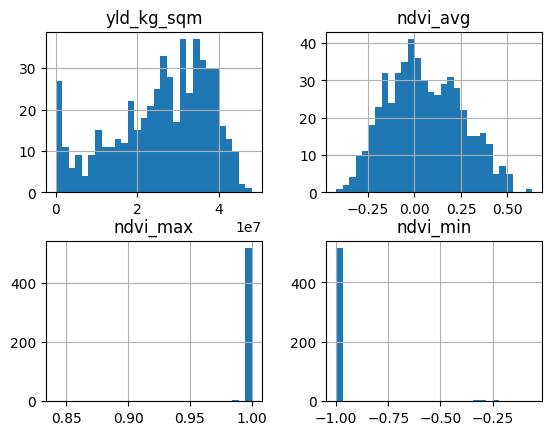

In [118]:
target.hist(bins=30)

<AxesSubplot: >

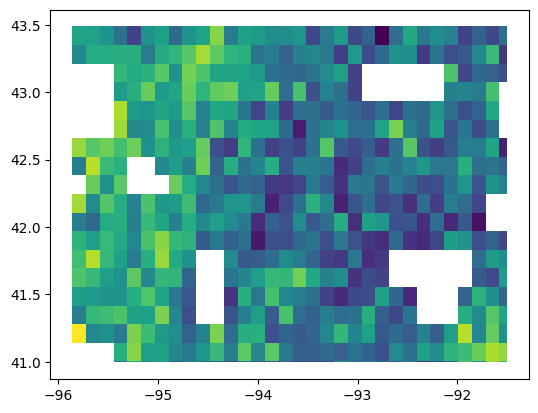

In [109]:
target.plot(column="ndvi_avg")

<AxesSubplot: >

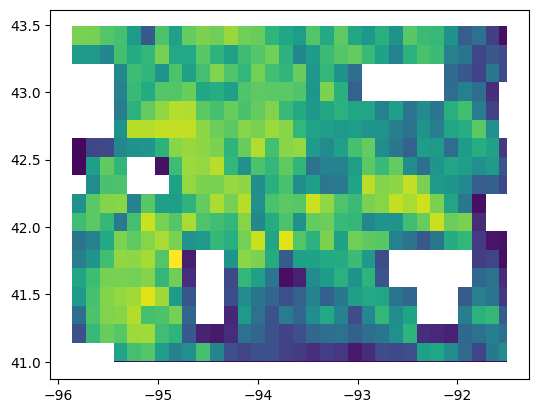

In [110]:
target.plot(column="yld_kg_sqm")

In [113]:
target.corr()

,yld_kg_sqm,ndvi_avg,ndvi_max,ndvi_min
yld_kg_sqm,1.000000,0.119344,0.002797,0.006190
ndvi_avg,0.119344,1.000000,-0.030243,0.119958
ndvi_max,0.002797,-0.030243,1.000000,-0.725890
ndvi_min,0.006190,0.119958,-0.725890,1.000000


<AxesSubplot: xlabel='yld_kg_sqm'>

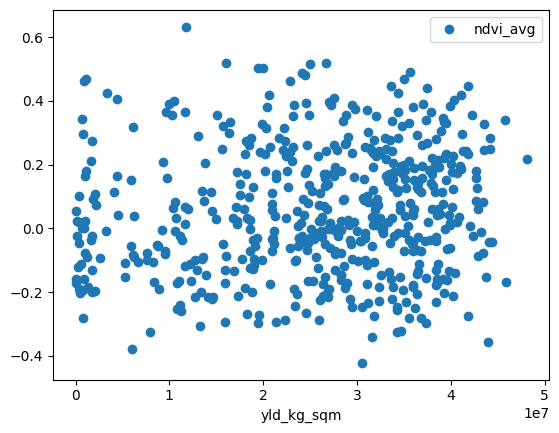

In [114]:

target_df = pd.DataFrame(target)
target_df.plot(x='yld_kg_sqm', y='ndvi_avg', style='o')